#Unsupervised Learning

Importing  necessary libraries.

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

definings the paths

In [19]:
DATA_PATH = "../data/processed_dataset.csv"     
VIS_DIR   = Path("visuals");  VIS_DIR.mkdir(parents=True, exist_ok=True)
ART_DIR   = Path("artifacts"); ART_DIR.mkdir(parents=True, exist_ok=True)
MODEL_DIR = Path("models");   MODEL_DIR.mkdir(parents=True, exist_ok=True)

Load data

In [20]:
df = pd.read_csv(DATA_PATH)

In [21]:
df.head().T

,0,1,2,3,4
Age,37.0,44.0,32.0,31.0,31.0
Gender,Male,Male,Male,Male,Male
self_employed,0.0,0.0,0.0,0.0,0.0
family_history,0.0,0.0,0.0,1.0,0.0
treatment,1.0,0.0,0.0,1.0,0.0
work_interfere,1.0,0.333333,0.333333,1.0,0.0
no_employees,0.2,1.0,0.2,0.4,0.6
remote_work,0.0,0.0,0.0,0.0,1.0
tech_company,1.0,0.0,1.0,1.0,1.0
leave,0.75,0.5,0.25,0.25,0.5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1252 non-null   float64
 1   Gender              1252 non-null   object 
 2   self_employed       1252 non-null   float64
 3   family_history      1252 non-null   float64
 4   treatment           1252 non-null   float64
 5   work_interfere      1252 non-null   float64
 6   no_employees        1252 non-null   float64
 7   remote_work         1252 non-null   float64
 8   tech_company        1252 non-null   float64
 9   leave               1252 non-null   float64
 10  mental_vs_physical  1252 non-null   float64
 11  Country_top         1252 non-null   object 
 12  workplace_support   1252 non-null   float64
 13  health_interview    1252 non-null   float64
 14  health_consequence  1252 non-null   float64
 15  social_support      1252 non-null   float64
dtypes: flo

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1252.0,NaN,NaN,NaN,32.074281,7.282914,18.0,27.0,31.0,36.0,72.0
Gender,1252,3,Male,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1252.0,NaN,NaN,NaN,0.113419,0.31723,0.0,0.0,0.0,0.0,1.0
family_history,1252.0,NaN,NaN,NaN,0.388179,0.48753,0.0,0.0,0.0,1.0,1.0
treatment,1252.0,NaN,NaN,NaN,0.503195,0.50019,0.0,0.0,1.0,1.0,1.0
work_interfere,1252.0,NaN,NaN,NaN,0.478967,0.334532,0.0,0.0,0.666667,0.666667,1.0
no_employees,1252.0,NaN,NaN,NaN,0.484824,0.341145,0.0,0.2,0.4,0.8,1.0
remote_work,1252.0,NaN,NaN,NaN,0.297923,0.457528,0.0,0.0,0.0,1.0,1.0
tech_company,1252.0,NaN,NaN,NaN,0.819489,0.384766,0.0,1.0,1.0,1.0,1.0
leave,1252.0,NaN,NaN,NaN,0.571486,0.272621,0.0,0.5,0.5,0.75,1.0


veryfying for null values

In [24]:
df.isnull().mean().sort_values(ascending=False)

Age                   0.0
Gender                0.0
self_employed         0.0
family_history        0.0
treatment             0.0
work_interfere        0.0
no_employees          0.0
remote_work           0.0
tech_company          0.0
leave                 0.0
mental_vs_physical    0.0
Country_top           0.0
workplace_support     0.0
health_interview      0.0
health_consequence    0.0
social_support        0.0
dtype: float64

In [25]:
num_features = [
    'self_employed','family_history','treatment','work_interfere','no_employees',
    'remote_work','tech_company','leave','mental_vs_physical',
    'workplace_support','health_interview','health_consequence','social_support'
]

ensuring that all the features exists

In [26]:
missing = [c for c in num_features if c not in df.columns]
assert not missing, f"Missing columns: {missing}"


In [27]:
X = df[num_features].copy()
X = X.fillna(X.median(numeric_only=True))

In [28]:
print(X.dtypes)
print(X.head())


self_employed         float64
family_history        float64
treatment             float64
work_interfere        float64
no_employees          float64
remote_work           float64
tech_company          float64
leave                 float64
mental_vs_physical    float64
workplace_support     float64
health_interview      float64
health_consequence    float64
social_support        float64
dtype: object
   self_employed  family_history  treatment  work_interfere  no_employees  \
0            0.0             0.0        1.0        1.000000           0.2   
1            0.0             0.0        0.0        0.333333           1.0   
2            0.0             0.0        0.0        0.333333           0.2   
3            0.0             1.0        1.0        1.000000           0.4   
4            0.0             0.0        0.0        0.000000           0.6   

   remote_work  tech_company  leave  mental_vs_physical  workplace_support  \
0          0.0           1.0   0.75                 1.0

 Standardize

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dimensionality Reduction


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #
X_pca = pca.fit_transform(X_scaled)

Clustering(Kmeans)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels


Evaluate Clustering

In [32]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.132


Visualize the clusters

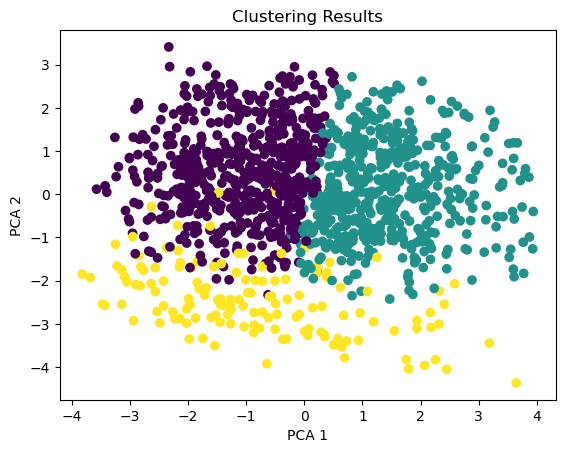

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering Results')
plt.show()


Saveing
 Model and Results

In [34]:
joblib.dump(kmeans, "../models/kmeans_model.pkl")

df.to_csv("../data/clustered_data.csv", index=False)
